In [1]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('df_with_clusters.xlsx')


In [2]:
# Drop rows with missing values in the 'id' column
df = df.dropna(subset=['id'])

# Ensure the 'id' column is of string type
df['id'] = df['id'].astype(str)

# Drop rows in the 'id' column that do not start with "US"
df = df[df['id'].str.startswith('US')]

# Drop duplicate rows in the 'id' column
df = df.drop_duplicates(subset=['id'])


In [3]:
# Drop the 'publication date' column
df = df.drop(columns=['publication date'])

# Read the combined_csv.csv file
df_combined = pd.read_csv(r'\patent_raw\combined_csv.csv')

# Ensure the 'id' column is of string type for merging
df['id'] = df['id'].astype(str)
df_combined['id'] = df_combined['id'].astype(str)

# Keep only the 'id' and 'publication date' columns from the combined_csv.csv file
df_combined = df_combined[['id', 'publication date']]

# Merge the 'publication date' column based on the 'id' column
df_merged = pd.merge(df, df_combined, on='id', how='left', suffixes=('', '_combined'))

# Save the result to a new Excel file
df_merged.to_excel('df_with_clusters_merged.xlsx', index=False)

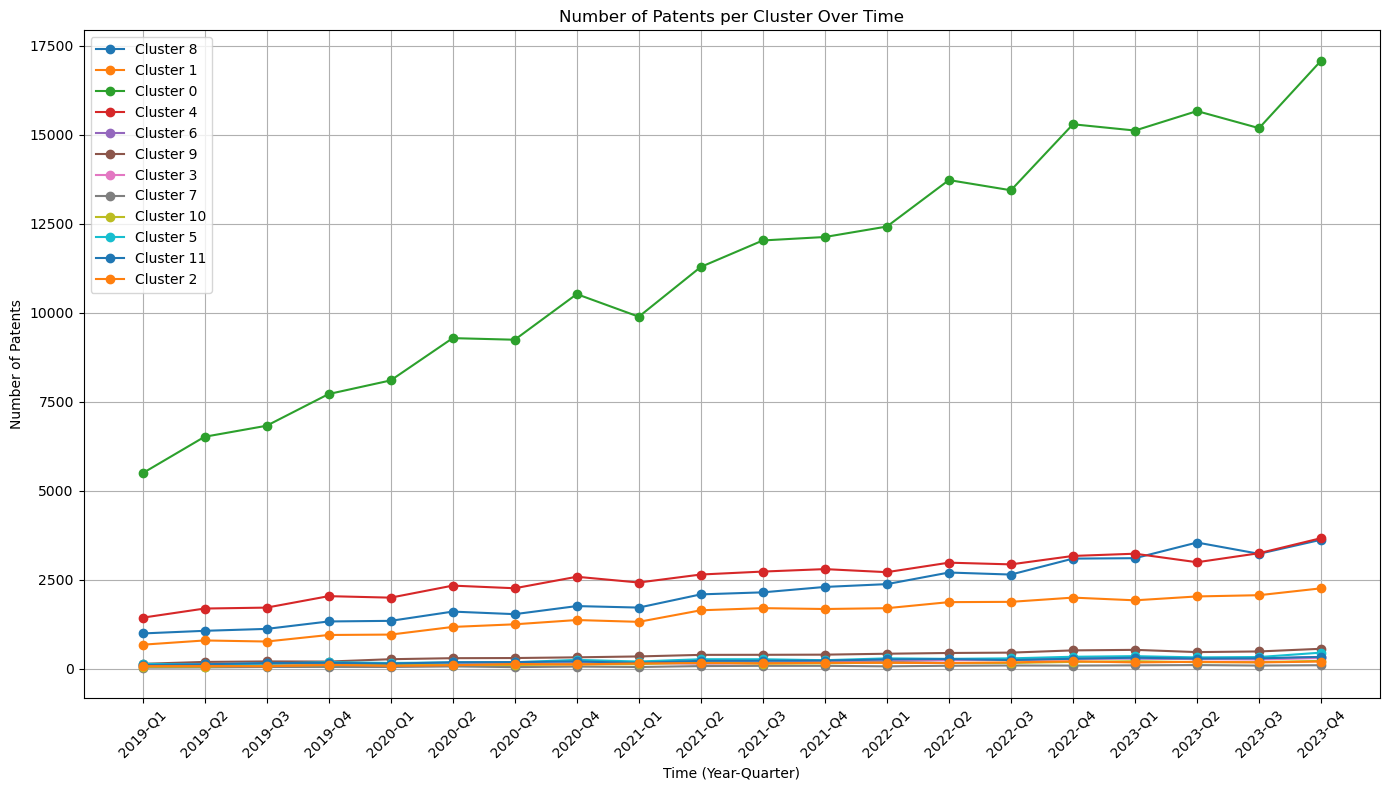

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged Excel file
df_merged = pd.read_excel('df_with_clusters_merged.xlsx')

# Ensure the 'publication date' column is of datetime type
df_merged['publication date'] = pd.to_datetime(df_merged['publication date'])

# Extract year and quarter information
df_merged['year'] = df_merged['publication date'].dt.year
df_merged['quarter'] = df_merged['publication date'].dt.quarter

# Count the number of different 'keywords_cluster' values for each quarter
quarterly_counts = df_merged.groupby(['year', 'quarter', 'keywords_cluster']).size().reset_index(name='count')

# Plot the trend graph
plt.figure(figsize=(14, 8))
for cluster in df_merged['keywords_cluster'].unique():
    cluster_data = quarterly_counts[quarterly_counts['keywords_cluster'] == cluster]
    plt.plot(cluster_data['year'].astype(str) + '-Q' + cluster_data['quarter'].astype(str),
             cluster_data['count'], marker='o', label=f"Cluster {cluster}")

plt.xlabel("Time (Year-Quarter)")
plt.ylabel("Number of Patents")
plt.title("Number of Patents per Cluster Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


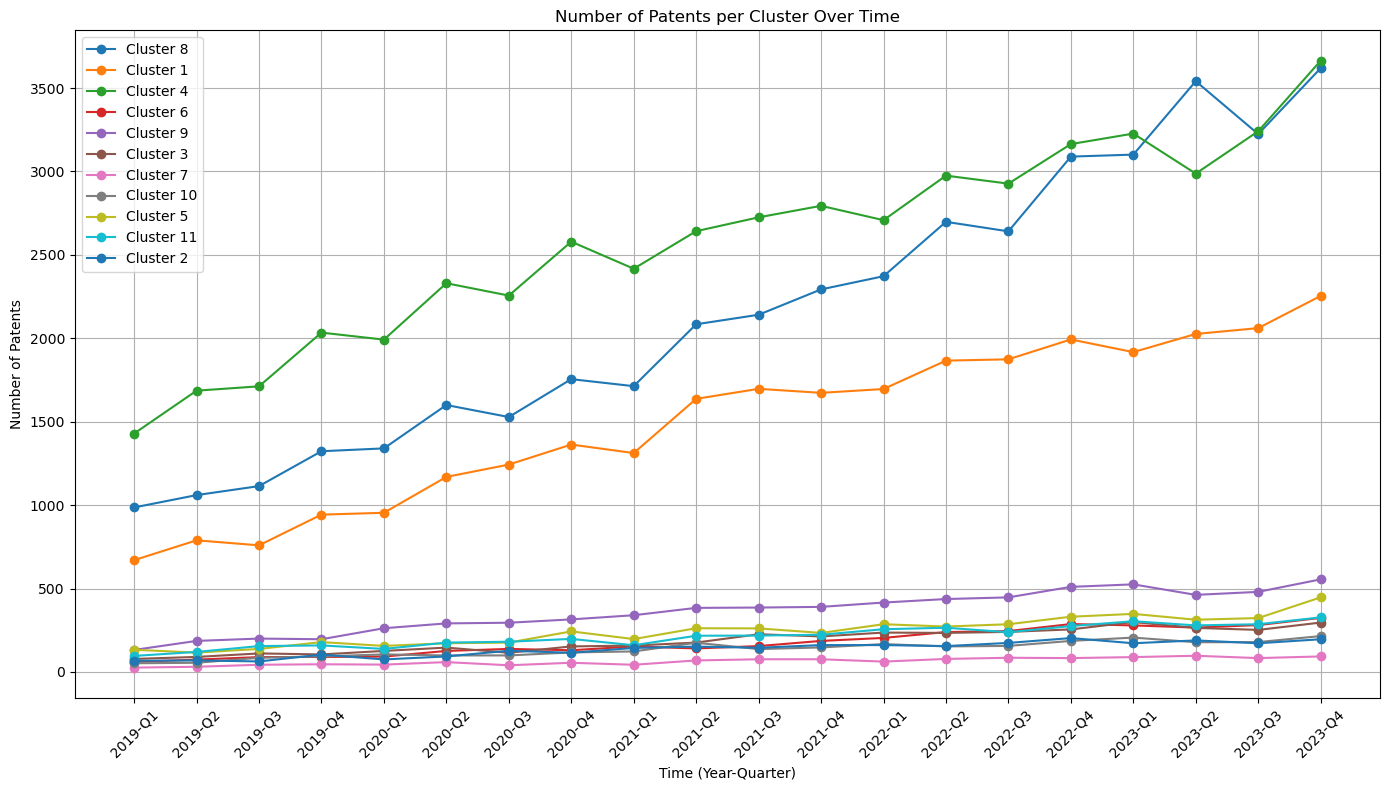

In [5]:
# plot trend graph excluding cluster 0
plt.figure(figsize=(14, 8))
for cluster in df_merged['keywords_cluster'].unique():
    if cluster != 0:  
        cluster_data = quarterly_counts[quarterly_counts['keywords_cluster'] == cluster]
        plt.plot(cluster_data['year'].astype(str) + '-Q' + cluster_data['quarter'].astype(str),
                 cluster_data['count'], marker='o', label=f"Cluster {cluster}")

plt.xlabel("Time (Year-Quarter)")
plt.ylabel("Number of Patents")
plt.title("Number of Patents per Cluster Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

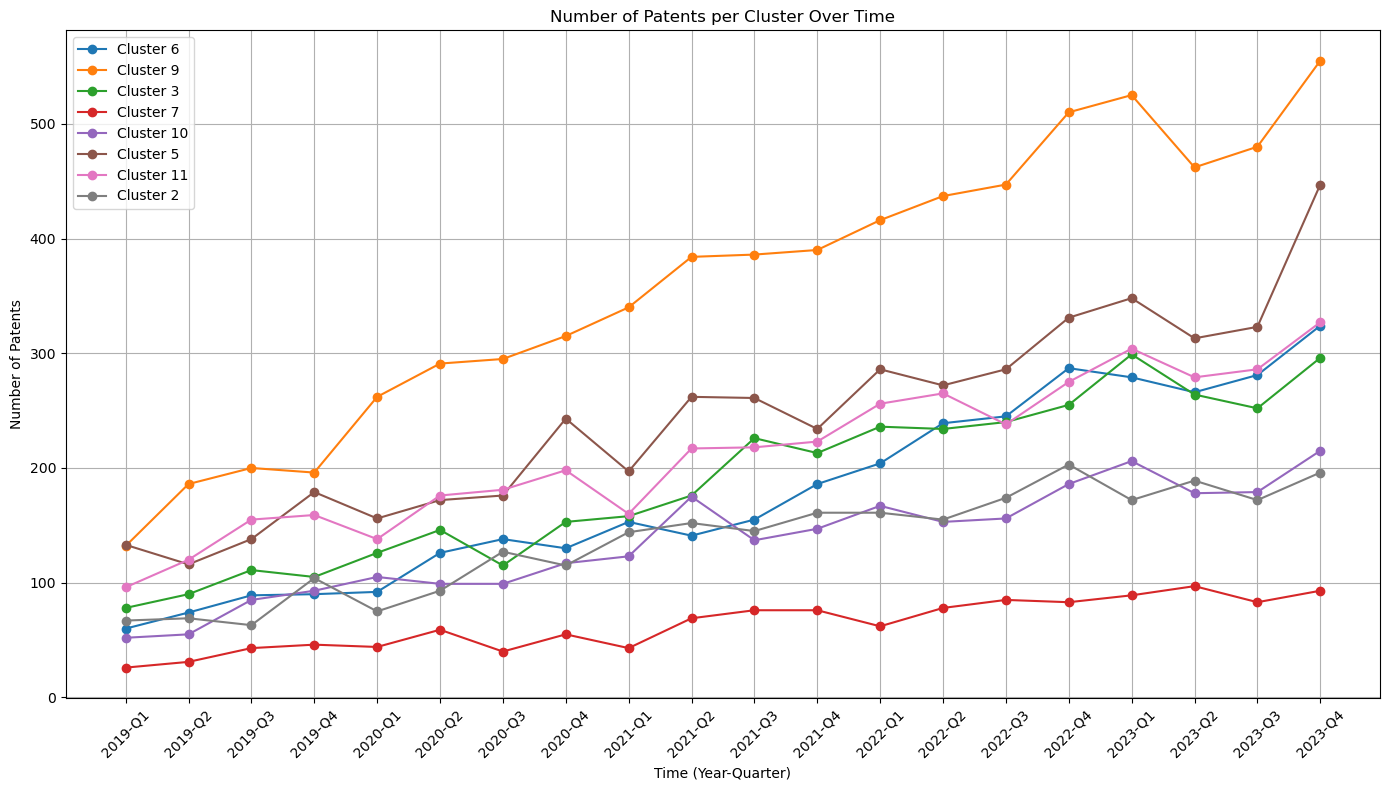

In [6]:
# plot trend graph excluding clusters 0, 1, 4, and 8
plt.figure(figsize=(14, 8))
for cluster in df_merged['keywords_cluster'].unique():
    if cluster != 0 and cluster != 1 and cluster != 4 and cluster != 8: 
        cluster_data = quarterly_counts[quarterly_counts['keywords_cluster'] == cluster]
        plt.plot(cluster_data['year'].astype(str) + '-Q' + cluster_data['quarter'].astype(str),
                 cluster_data['count'], marker='o', label=f"Cluster {cluster}")

plt.xlabel("Time (Year-Quarter)")
plt.ylabel("Number of Patents")
plt.title("Number of Patents per Cluster Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# read csv
file_path = 'all_patent_info.csv'
data = pd.read_csv(file_path)

# calculate the number of rows containing the keywords related to large language models
keywords = ["large language model", "LLM", "NLP", "natural language processing", "GPT", "BERT", "transformer"]
count = data['abstract'].str.contains('|'.join(keywords), case=False, na=False).sum()

print(f"Number of rows containing the keywords: {count}")

Number of rows containing the keywords: 4174


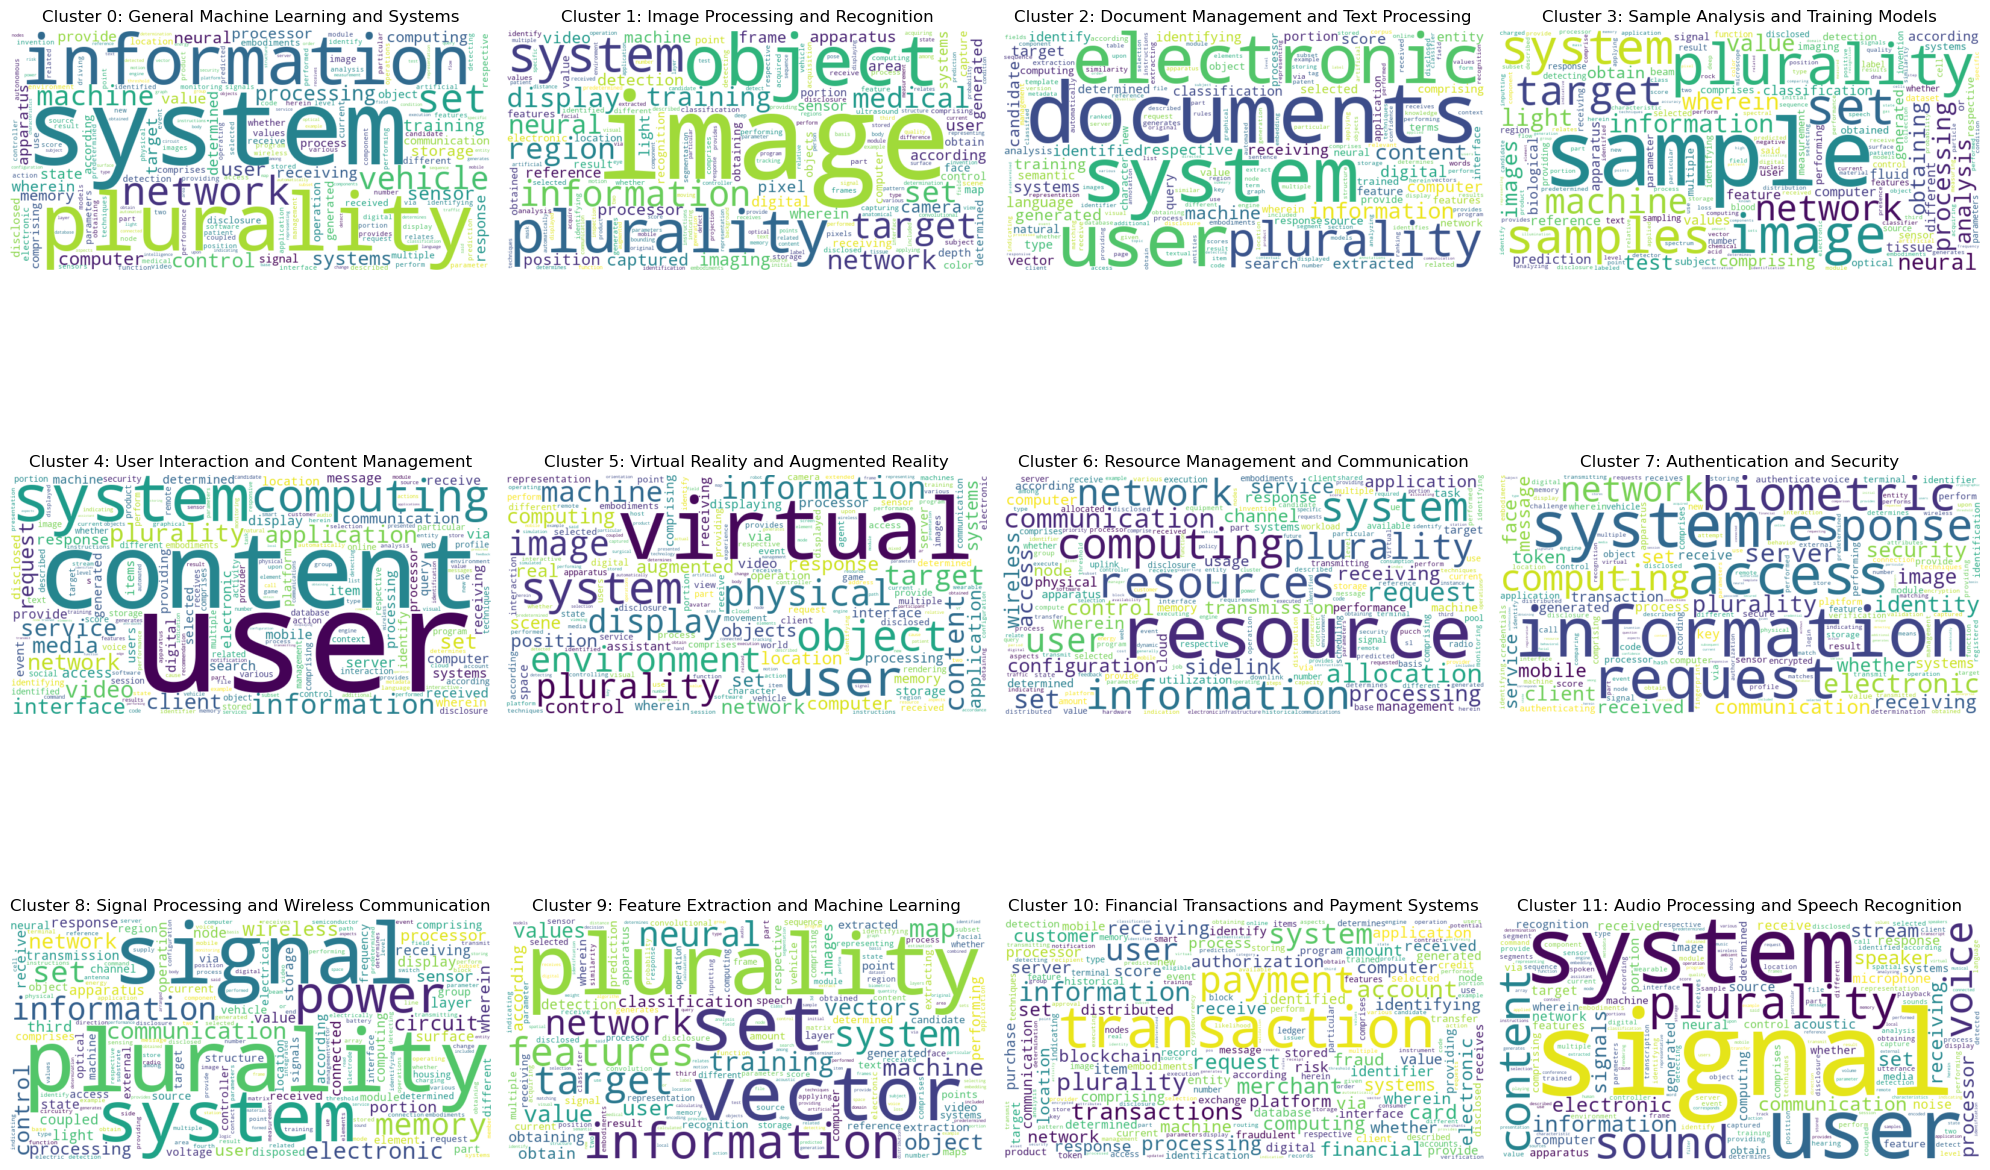

In [13]:
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the keyword file
with open('keyword.out', 'r') as file:
    data = file.read()

# Adjusted regular expression to match keywords and frequencies for each cluster
pattern = re.compile(r'Cluster (\d+) top words:\n(?:.*?)\n(.*?)\n(?=Cluster \d+ top words:|$)', re.S)

matches = pattern.findall(data)

# Initialize a dictionary to store keywords and frequencies for each cluster
clusters = {}

# Define stopwords
stopwords = {"one", "first", "second", "least", "may", "method", "data", "includes",
             "using", "configured", "model", "associated", "methods", "include", 
             "input", "determining", "including", "present", "time", "determine",
             "corresponding", "using", "generate", "unit", "used", "output", "provided", 
             "within", "also", "generating", "includes", "based", "device", "devices"}

for match in matches:
    cluster_id = int(match[0])
    words_data = match[1].strip()
    words_list = re.findall(r'(\w+)\s+(\d+)', words_data)
    # Filter out stopwords and numeric keywords
    clusters[cluster_id] = {word: int(count) for word, count in words_list if word not in stopwords and not word.isdigit()}

# List of cluster names in English
cluster_names = [
    "General Machine Learning and Systems",
    "Image Processing and Recognition",
    "Document Management and Text Processing",
    "Sample Analysis and Training Models",
    "User Interaction and Content Management",
    "Virtual Reality and Augmented Reality",
    "Resource Management and Communication",
    "Authentication and Security",
    "Signal Processing and Wireless Communication",
    "Feature Extraction and Machine Learning",
    "Financial Transactions and Payment Systems",
    "Audio Processing and Speech Recognition"
]

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, (cluster_id, words) in enumerate(clusters.items()):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Cluster {cluster_id}: {cluster_names[cluster_id]}')

plt.tight_layout()
# plt.savefig('all_clusters_wordcloud.png')
plt.show()

In [25]:
df_merged = pd.read_excel('df_with_clusters_merged.xlsx')

# Keep only the 'id' and 'citedby' columns from the combined_csv.csv file
data = data[['id', 'citedby']]

# Merge the 'citedby' column based on the 'id' column
df_merged = pd.merge(df_merged, data, on='id', how='left', suffixes=('', '_combined'))

# Save the result to a new Excel file
df_merged.to_excel('df_with_clusters_merged.xlsx', index=False)


In [20]:
# define a function to count the number of citations
def count_citations(citedby_str):
    # if citedby_str is empty, return 0
    if citedby_str in ["{}", ""]:
        return 0
    # otherwise, count the number of citations
    return citedby_str.count("', '") + 1

# add a new column 'citedby_num' to the DataFrame
df_merged['citedby_num'] = df_merged['citedby'].apply(count_citations)

df_merged

,id,keywords_cluster,publication date,citedby,citedby_num
0,US-2023254709-A1,8,2023-08-10,{},0
1,US-11012657-B2,1,2021-05-18,{'US20220360795A1': 'Beijing Xiaomi Mobile Sof...,1
2,US-2019379856-A1,1,2019-12-12,"{'US20180122130A1': 'Samsung Electronics Co., ...",14
3,US-2021176445-A1,1,2021-06-10,{'US20220336692A1': 'Fujifilm Business Innovat...,2
4,US-11095866-B2,1,2021-08-17,{},0
...,...,...,...,...,...
381978,US-2019022857-A1,0,2019-01-24,"{'EP3586782A1': 'Globus Medical, Inc.', 'US109...",15
381979,US-2019164218-A1,0,2019-05-30,"{'US20180354139A1': 'Kuo Guang Wang', 'US20190...",6
381980,US-2021169305-A1,1,2021-06-10,{'US11612306B2': 'Sony Corporation'},1
381981,US-2021271359-A1,0,2021-09-02,{},0


                  patent_count  total_citations  average_quality
keywords_cluster                                                
1                        29896            75389         2.521709
2                         2737             6577         2.402996
3                         3773             8044         2.131990
4                        51489           130624         2.536930
5                         4873            14799         3.036938
6                         3559            10100         2.837876
7                         1278             4027         3.151017
8                        43222           111768         2.585905
9                         7209            19683         2.730337
10                        2727             6887         2.525486
11                        4271            10638         2.490752


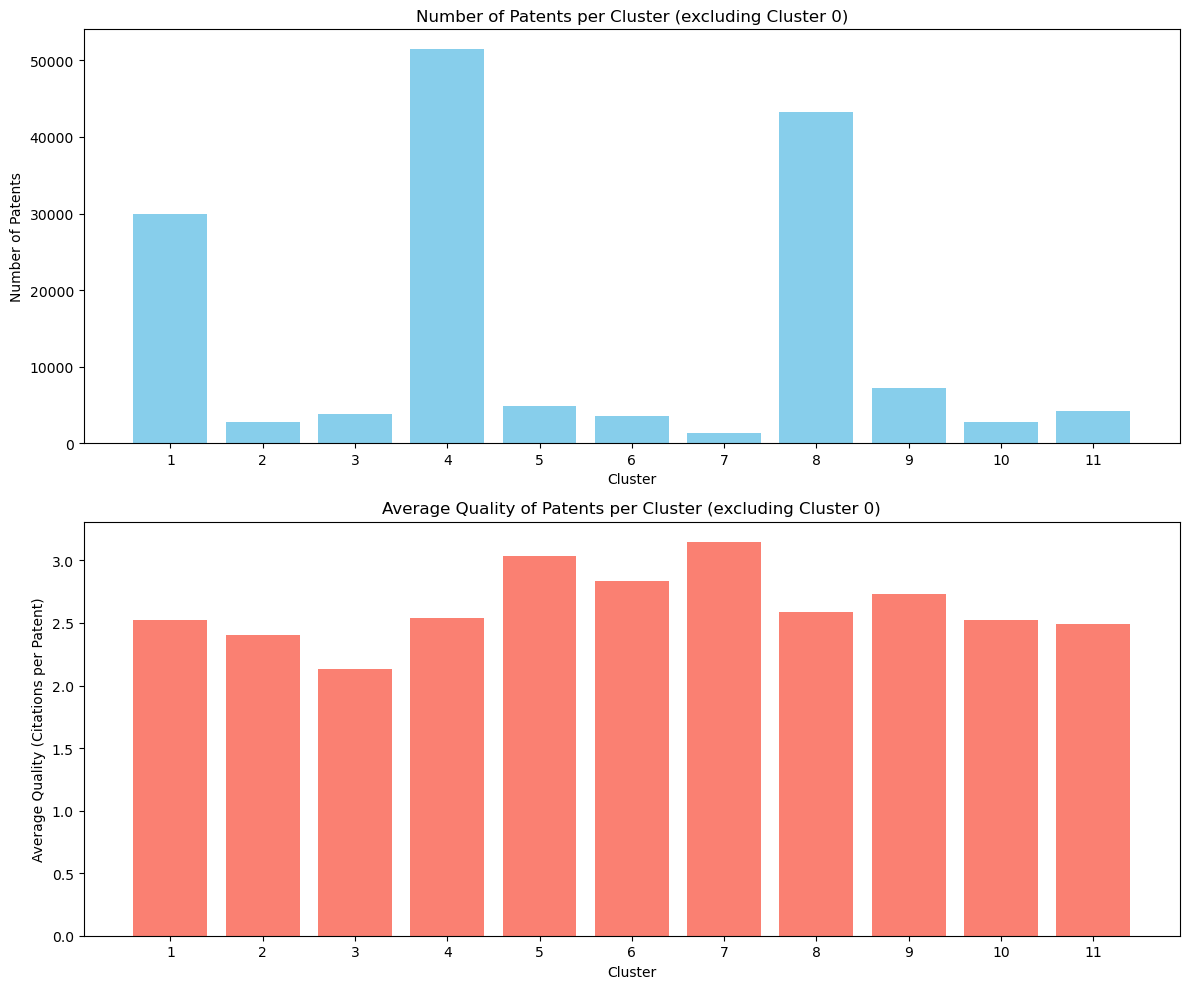

In [23]:
# Remove rows where 'keywords_cluster' is equal to 0
df_filtered = df_merged[df_merged['keywords_cluster'] != 0]

# Calculate the number and quality of patents for each cluster
cluster_stats = df_filtered.groupby('keywords_cluster').agg(
    patent_count=('keywords_cluster', 'size'),
    total_citations=('citedby_num', 'sum')
)
cluster_stats['average_quality'] = cluster_stats['total_citations'] / cluster_stats['patent_count']

# Print the statistics
print(cluster_stats)

# Generate bar charts
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Bar chart for the number of patents per cluster
ax[0].bar(cluster_stats.index, cluster_stats['patent_count'], color='skyblue')
ax[0].set_title('Number of Patents per Cluster (excluding Cluster 0)')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel('Number of Patents')
ax[0].set_xticks(cluster_stats.index)
ax[0].set_xticklabels(cluster_stats.index)

# Bar chart for the average quality of patents per cluster
ax[1].bar(cluster_stats.index, cluster_stats['average_quality'], color='salmon')
ax[1].set_title('Average Quality of Patents per Cluster (excluding Cluster 0)')
ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Average Quality (Citations per Patent)')
ax[1].set_xticks(cluster_stats.index)
ax[1].set_xticklabels(cluster_stats.index)

# Adjust layout
plt.tight_layout()
# plt.savefig('cluster_patent_stats_excluding_0.png')
plt.show()
